21 Sep 2023

My project this week:

I want a figure which directly shows the impact of 
- age uncertainty
- SpT-Teff relation uncertainty

on how well we can estimate masses from spectral types.

It will necessarily neglect "model uncertainty" i.e. are the models accurately connecting mass & age to Teff. I believe there is no "distance uncertainty" as spectral type determination is independent of distance (assuming adequate S/N).

Plot dream:
```
 | ...
M|  ...
a|   .....
s|     ......
s|       .....
 L_____________
  Spectral Type
```


In [7]:
import numpy as np
import matplotlib.pyplot as plt


In [1]:
# Let's do it SIMPLY i.e. with just ONE set of masses, ages, etc.


In [141]:
from wuvars.publication_figures.HR_diagram_NGC_IC import extract_age_array_Gyr, load_isochrone_generic
from wuvars.analysis.spectral_type_to_temperature import get_SpT_from_Teff_HH14, get_SpT_from_Teff
from wuvars.analysis.spectral_type_to_number import get_num_from_SpT, get_SpT_from_num


In [25]:
age = 2.0
iso = load_isochrone_generic(age)

In [27]:
teff = iso[:,1]
mass = iso[:,0]
SpT_L03 = get_SpT_from_Teff(teff)
SpT_HH14 = get_SpT_from_Teff_HH14(teff)
list(zip(mass, SpT_L03 - SpT_HH14))

[(0.01, -0.1188428633251597),
 (0.015, -0.46497115462744887),
 (0.02, -0.5416129032258059),
 (0.03, 0.3796774193548389),
 (0.04, 0.7202614379084968),
 (0.05, 0.9555555555555557),
 (0.06, 1.1348039215686274),
 (0.07, 1.1499999999999995),
 (0.072, 1.1462121212121215),
 (0.075, 1.1409090909090915),
 (0.08, 1.1333333333333329),
 (0.09, 1.125757575757576),
 (0.1, 1.0969696969696976),
 (0.11, 1.0317460317460316),
 (0.13, 0.9312169312169312),
 (0.15, 0.8201058201058204),
 (0.17, 0.6883415435139577),
 (0.2, 0.523510971786834),
 (0.3, 0.030344827586207046),
 (0.4, -0.029741379310344707),
 (0.5, 0.0),
 (0.6, 0.0),
 (0.7, 0.0),
 (0.8, 0.0),
 (0.9, 0.0),
 (1.0, 0.0),
 (1.1, 0.0),
 (1.2, 0.0),
 (1.3, 0.0),
 (1.4, 0.0)]

Text(0.5, 1.0, '2 Myr ')

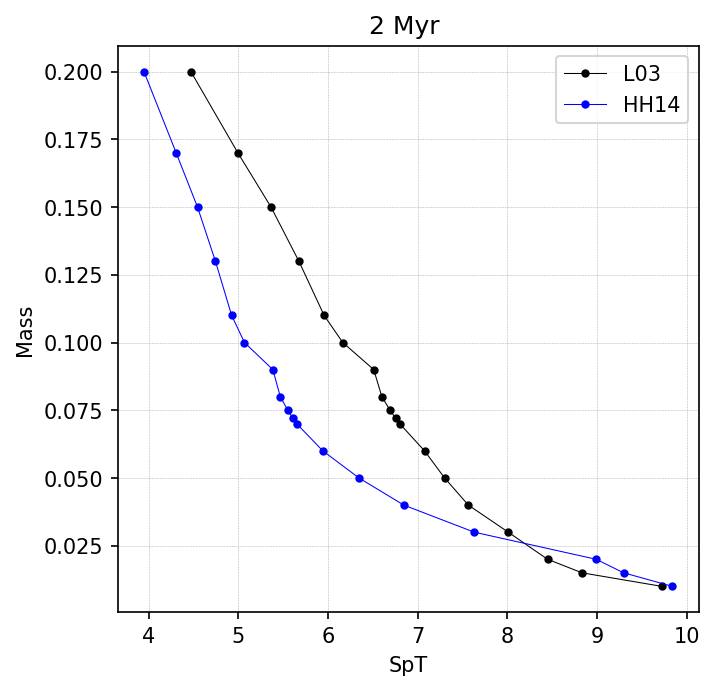

In [44]:
fig, ax = plt.subplots(figsize=(5,5), dpi=150)
plt.grid(True, linestyle='--', lw=0.25)
small = mass<=0.2
# placeholders!
# spts = np.arange(10)
# masses = 10-np.arange(10)
ax.plot(SpT_L03[small], mass[small], 'k.-', lw=0.5, label="L03")
ax.plot(SpT_HH14[small], mass[small], 'b.-', lw=0.5, label='HH14')
# ax.semilogy()

ax.legend()
ax.set_xlabel("SpT")
ax.set_ylabel("Mass")
ax.set_title("2 Myr ")

[(0.01, 13.544827586206896, 13.544827586206896), (0.015, 9.612334801762115, 9.778337531486146), (0.02, 8.616129032258064, 9.128463476070529), (0.03, 8.09032258064516, 7.88), (0.04, 7.658823529411765, 7.02), (0.05, 7.2176470588235295, 6.188888888888889), (0.06, 6.818181818181818, 5.666666666666667), (0.07, 6.4, 5.283333333333333), (0.072, 6.327272727272727, 5.216666666666667), (0.075, 6.209090909090909, 5.108333333333333), (0.08, 6.027272727272727, 4.966666666666667), (0.09, 5.770370370370371, 4.804761904761905), (0.1, 5.555555555555555, 4.666666666666667), (0.11, 5.37037037037037, 4.5476190476190474), (0.13, 5.051851851851852, 4.3428571428571425), (0.15, 4.76551724137931, 4.147619047619047), (0.17, 4.503448275862069, 3.9681818181818183), (0.2, 4.206896551724138, 3.772727272727273), (0.3, 3.3586206896551722, 3.213636363636364), (0.4, 2.3586206896551722, 2.3466666666666667), (0.5, 1.3724137931034481, 1.43125), (0.6, 1.0, 1.0), (0.7, 1.0, 1.0), (0.8, 1.0, 1.0), (0.9, 1.0, 1.0), (1.0, 1.0,

Text(0, 0.5, 'Mass')

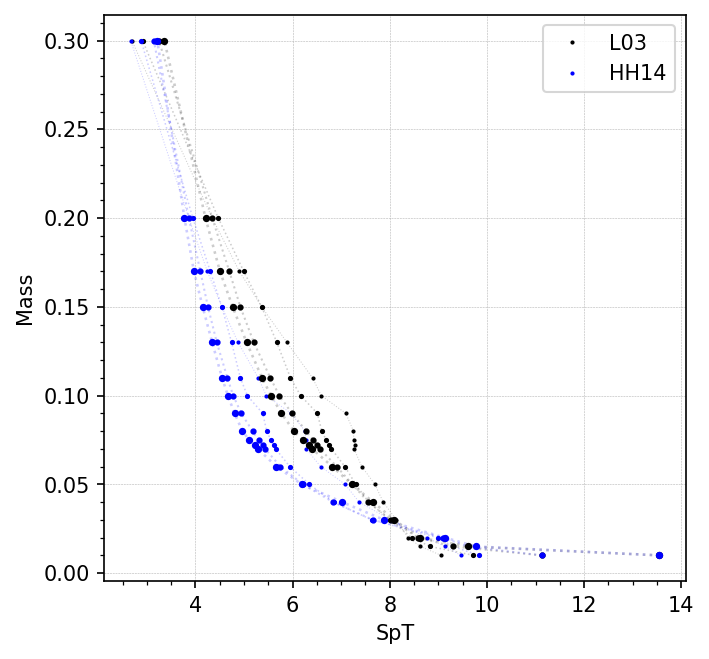

In [62]:
fig, ax = plt.subplots(figsize=(5,5), dpi=150)
plt.grid(True, linestyle='--', lw=0.25)

ages = [0.5, 2.0, 5.0, 10.0]
lw_array = [0.5, 0.75, 1.0, 1.25]
ms_array = [2, 3, 4, 5]

for age, lw, ms in zip(ages, lw_array, ms_array):
    iso = load_isochrone_generic(age)
    mass = iso[:,0]
    teff = iso[:,1]
    SpT_L03 = get_SpT_from_Teff(teff)
    SpT_HH14 = get_SpT_from_Teff_HH14(teff)
    
    if age == 10:
        print(list(zip(mass, SpT_L03, SpT_HH14)))

    small = mass<=0.3

    ax.plot(SpT_L03[small], mass[small], 'k:', lw=lw, alpha=0.2)
    ax.plot(SpT_HH14[small], mass[small], 'b:', lw=lw, alpha=0.2)

    ax.plot(SpT_L03[small], mass[small], 'k.', lw=lw, ms=ms, label="L03")
    ax.plot(SpT_HH14[small], mass[small], 'b.', lw=lw, ms=ms, label='HH14')
    
    if age == ages[0]: 
        ax.legend()
    
ax.minorticks_on()
ax.set_xlabel("SpT")
ax.set_ylabel("Mass")
# ax.set_title("2 Myr ")


In [63]:
SpT_interp = lambda x: np.interp(x, teff_array[::-1], spt_num_array[::-1], left=np.nan, right=np.nan)

In [67]:
from wuvars.analysis.spectral_type_to_temperature import teff_array, spt_num_array

In [71]:
SpT_interp(3000)

5.925925925925926

In [72]:
csv_filename = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/publication_figures/TeffSpT_relations.csv"

In [74]:
import pandas as pd
df = pd.read_csv(csv_filename)
print(df)

   SpT  SpTnum     L03    HH14    PM13    LV23     F16     S09     R10
0   M1       1  3705.0  3720.0  3630.0  3663.0     NaN     NaN     NaN
1   M2       2  3560.0  3560.0  3490.0  3525.0     NaN     NaN     NaN
2   M3       3  3415.0  3410.0  3360.0  3462.0     NaN     NaN     NaN
3   M4       4  3270.0  3190.0  3160.0  3332.0     NaN     NaN     NaN
4   M5       5  3125.0  2980.0  2880.0  3237.0     NaN     NaN     NaN
5   M6       6  2990.0  2860.0     NaN     NaN     NaN  2777.0  2854.0
6   M7       7  2880.0  2770.0     NaN     NaN     NaN  2673.0  2810.0
7   M8       8  2710.0  2670.0     NaN     NaN  2600.0  2546.0  2687.8
8   M9       9  2400.0  2570.0     NaN     NaN  2370.0  2406.0     NaN
9   L0      10     NaN     NaN     NaN     NaN  2173.0  2259.0     NaN
10  L1      11     NaN     NaN     NaN     NaN  1983.0  2112.0     NaN
11  L2      12     NaN     NaN     NaN     NaN  1809.0  1971.0     NaN
12  L3      13     NaN     NaN     NaN     NaN  1649.0  1840.0     NaN
13  L4

In [86]:
df.columns[2:]
df['L03'].values

array([3705., 3560., 3415., 3270., 3125., 2990., 2880., 2710., 2400.,
         nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
         nan])

In [113]:
spt_array = df['SpTnum']
for col in df.columns[2:]:
    print(col)
    
    nonnan = ~np.isnan(df[col].values)
    
    SpT_interp = lambda teff: np.interp(
        teff, 
        df[col].values[nonnan][::-1], 
        spt_array.values[nonnan][::-1],
        left=np.nan,
        right=np.nan)
    
    print(SpT_interp(3500), SpT_interp(3000), SpT_interp(2500), SpT_interp(2000))

L03
2.413793103448276 5.925925925925926 8.67741935483871 nan
HH14
2.4 4.904761904761905 nan nan
PM13
1.9285714285714286 4.571428571428571 nan nan
LV23
2.3968253968253967 nan nan nan
F16
nan nan 8.434782608695652 10.910526315789474
S09
nan nan 8.32857142857143 11.794326241134751
R10
nan nan nan nan


In [109]:
xx = df['PM13'].values
xx[~np.isnan(xx)]

array([3630., 3490., 3360., 3160., 2880.])

In [111]:
np.interp(3500, xx[~np.isnan(xx)][::-1], spt_array.values[~np.isnan(xx)][::-1])

1.9285714285714286

L03
H burning limit has SpT  [6.83636364]
HH14
H burning limit has SpT  [5.68333333]
PM13
H burning limit has SpT  [4.93571429]
LV23
H burning limit has SpT  [nan]
F16
H burning limit has SpT  [nan]
S09
H burning limit has SpT  [nan]
L03
H burning limit has SpT  [6.6]
HH14
H burning limit has SpT  [5.46666667]
PM13
H burning limit has SpT  [4.84285714]
LV23
H burning limit has SpT  [nan]
F16
H burning limit has SpT  [nan]
S09
H burning limit has SpT  [nan]
L03
H burning limit has SpT  [6.53636364]
HH14
H burning limit has SpT  [5.40833333]
PM13
H burning limit has SpT  [4.81785714]
LV23
H burning limit has SpT  [nan]
F16
H burning limit has SpT  [nan]
S09
H burning limit has SpT  [nan]
L03
H burning limit has SpT  [6.28181818]
HH14
H burning limit has SpT  [5.175]
PM13
H burning limit has SpT  [4.71785714]
LV23
H burning limit has SpT  [nan]
F16
H burning limit has SpT  [nan]
S09
H burning limit has SpT  [nan]


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:63: UserWarning: FixedFormatter should only be used together with FixedLocator


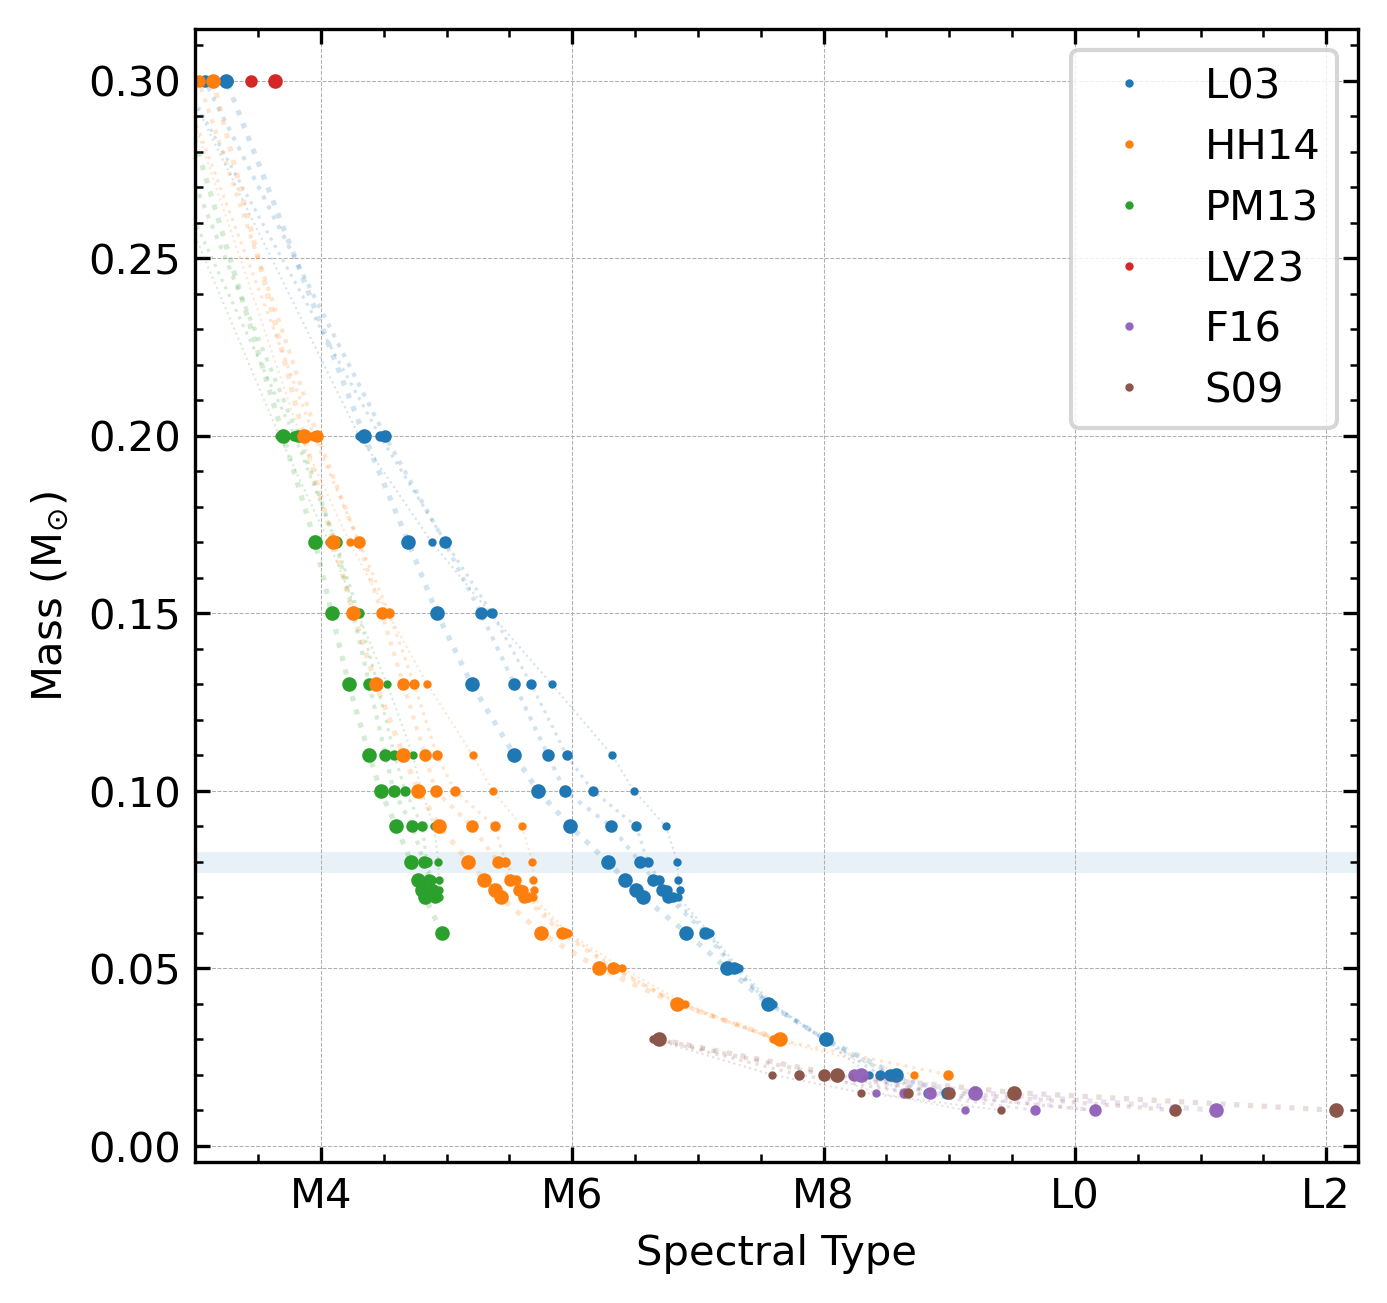

In [170]:
import matplotlib as mpl
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

fig, ax = plt.subplots(figsize=(5,5), dpi=300)
plt.grid(True, linestyle='--', lw=0.25)

# ages = [0.5, 2.0, 5.0, 10.0]
ages = [1, 2.0, 3, 5.0]
# ages = [0.5]
lw_array = [0.5, 0.75, 1.0, 1.25]
ms_array = [2, 3, 4, 5]
colors = [f"C{x}" for x in range(6)]

for age, lw, ms in zip(ages, lw_array, ms_array):
    iso = load_isochrone_generic(age)
    mass = iso[:,0]
    teff = iso[:,1]
    
    spt_array = df['SpTnum']
    for col, color in zip(df.columns[2:-1], colors):
        print(col)

        nonnan = ~np.isnan(df[col].values)

        SpT_interp = lambda teff: np.interp(
            teff, 
            df[col].values[nonnan][::-1], 
            spt_array.values[nonnan][::-1],
            left=np.nan,
            right=np.nan)
        
        SpTs = SpT_interp(teff)
#         print(col, SpTs)
        
        small = mass<=0.3
        ax.plot(SpTs[small], mass[small], ':', color=color, lw=lw, alpha=0.2)
        ax.plot(SpTs[small], mass[small], '.', color=color, lw=lw, ms=ms, label=col)
        
        print("H burning limit has SpT ", SpTs[mass==0.08])
    
#     if age == 10:
#         print(list(zip(mass, SpT_L03, SpT_HH14)))

#     small = mass<=0.3

#     ax.plot(SpT_L03[small], mass[small], 'k:', lw=lw, alpha=0.2)
#     ax.plot(SpT_HH14[small], mass[small], 'b:', lw=lw, alpha=0.2)

#     ax.plot(SpT_L03[small], mass[small], 'k.', lw=lw, ms=ms, label="L03")
#     ax.plot(SpT_HH14[small], mass[small], 'b.', lw=lw, ms=ms, label='HH14')
    
    if age == ages[0]: 
        ax.legend()

ax.axhline(0.08, zorder=-10, alpha=0.1, lw=5)
ax.set_xlim(3, 12.25)
ax.minorticks_on()

# gets all the xticks, converts them into proper spectral type strings, then puts them as labels
ax.set_xticklabels(np.array([get_SpT_from_num(int(x)) for x in ax.get_xticks()]))

ax.set_xlabel("Spectral Type")
ax.set_ylabel("Mass (M$_{\odot}$)")
# ax.set_title("2 Myr ")
# ax.semilogy()
plt.savefig("spectral_type_v_mass.pdf")

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator


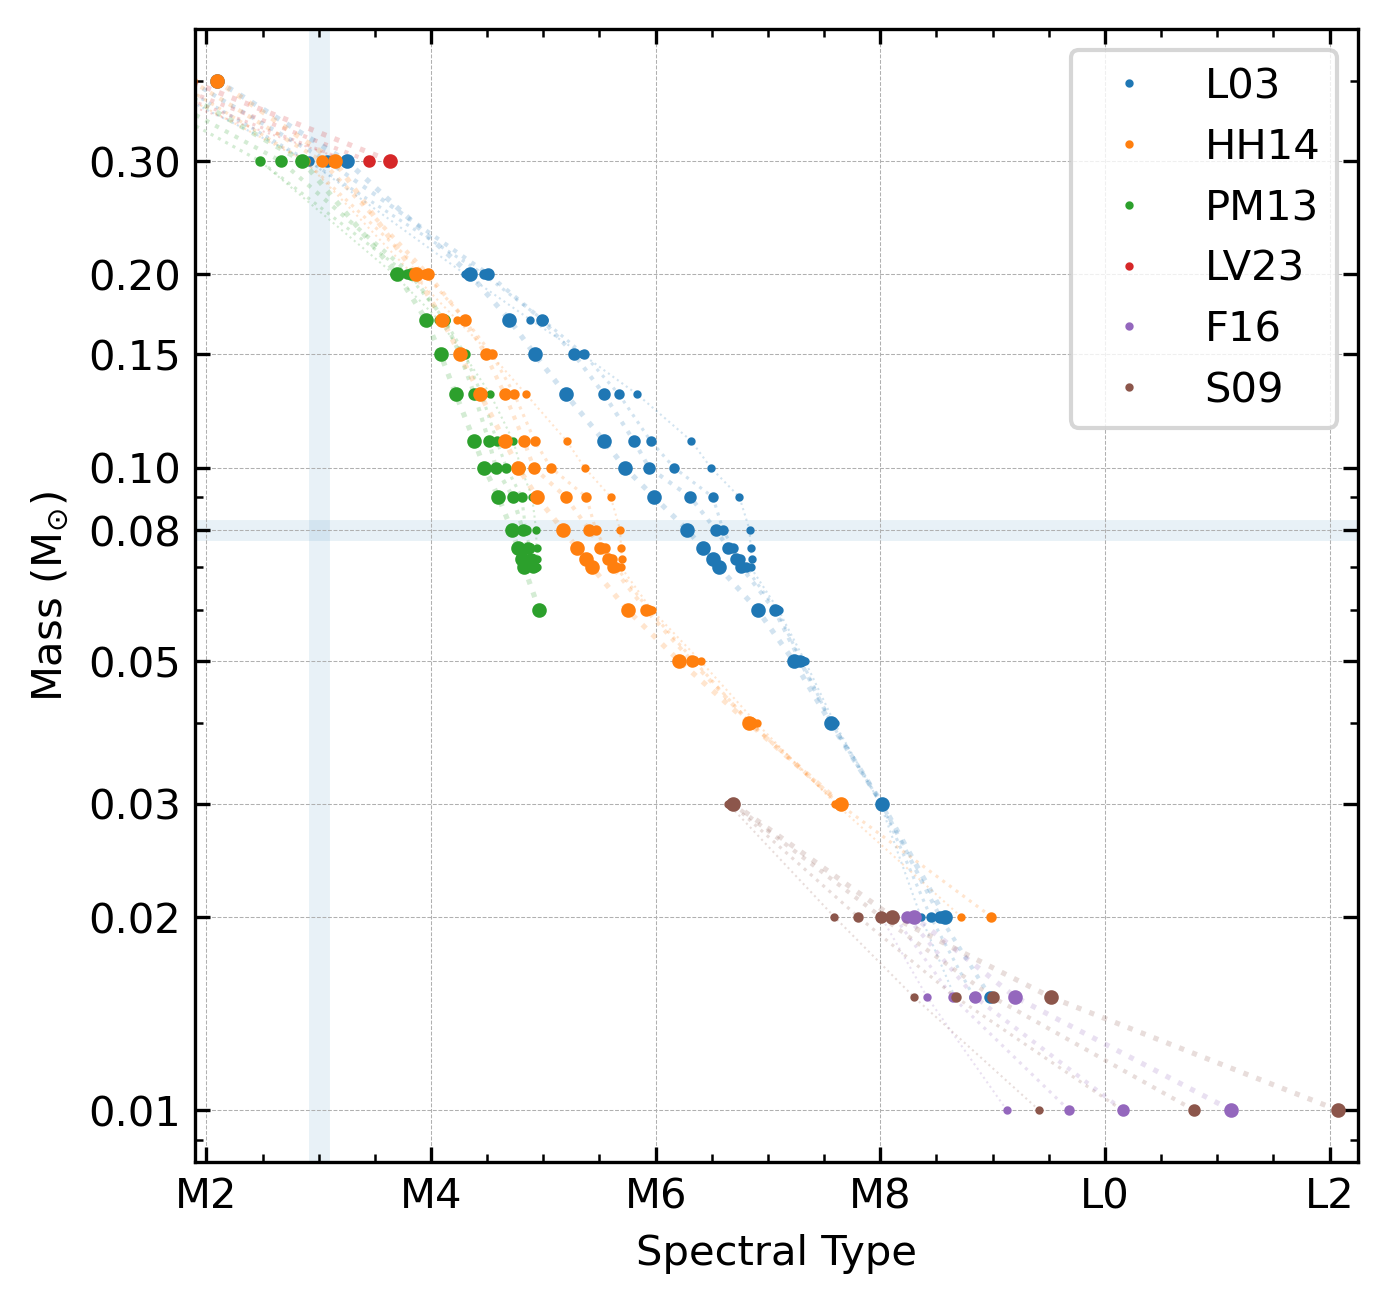

In [198]:
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

fig, ax = plt.subplots(figsize=(5,5), dpi=300)
plt.grid(True, linestyle='--', lw=0.25)

# ages = [0.5, 2.0, 5.0, 10.0]
ages = [1, 2.0, 3, 5.0]
# ages = [0.5]
lw_array = [0.5, 0.75, 1.0, 1.25]
ms_array = [2, 3, 4, 5]
colors = [f"C{x}" for x in range(6)]

for age, lw, ms in zip(ages, lw_array, ms_array):
    iso = load_isochrone_generic(age)
    mass = iso[:,0]
    teff = iso[:,1]
    
    spt_array = df['SpTnum']
    for col, color in zip(df.columns[2:-1], colors):
#        print(col)

        nonnan = ~np.isnan(df[col].values)

        SpT_interp = lambda teff: np.interp(
            teff, 
            df[col].values[nonnan][::-1], 
            spt_array.values[nonnan][::-1],
            left=np.nan,
            right=np.nan)
        
        SpTs = SpT_interp(teff)
#         print(col, SpTs)
        
        small = mass<=0.4
        ax.plot(SpTs[small], mass[small], ':', color=color, lw=lw, alpha=0.2)
        ax.plot(SpTs[small], mass[small], '.', color=color, lw=lw, ms=ms, label=col)
        
#         print("H burning limit has SpT ", SpTs[mass==0.08])
    
#     if age == 10:
#         print(list(zip(mass, SpT_L03, SpT_HH14)))

#     small = mass<=0.3

#     ax.plot(SpT_L03[small], mass[small], 'k:', lw=lw, alpha=0.2)
#     ax.plot(SpT_HH14[small], mass[small], 'b:', lw=lw, alpha=0.2)

#     ax.plot(SpT_L03[small], mass[small], 'k.', lw=lw, ms=ms, label="L03")
#     ax.plot(SpT_HH14[small], mass[small], 'b.', lw=lw, ms=ms, label='HH14')
    
    if age == ages[0]: 
        ax.legend()

ax.axhline(0.08, zorder=-10, alpha=0.1, lw=5)
ax.axvline(3, zorder=-10, alpha=0.1, lw=5)

ax.set_xlim(1.9, 12.25)
ax.minorticks_on()

# gets all the xticks, converts them into proper spectral type strings, then puts them as labels
ax.set_xticklabels(np.array([get_SpT_from_num(int(x)) for x in ax.get_xticks()]))

ax.set_xlabel("Spectral Type")
ax.set_ylabel("Mass (M$_{\odot}$)")
# ax.set_title("2 Myr ")
ax.semilogy()

ax.yaxis.set_major_formatter(ScalarFormatter())
# ax.yaxis.set_ticks([0.01, 0.1])
# ax.yaxis.set_ticklabels([str(x) for x in [0.01, 0.1]])
ax.yaxis.set_ticks([0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2, 0.3])
#ax.yaxis.set_ticks([0.01, 0.02, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2, 0.3], minor=True)
# ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

plt.savefig("spectral_type_v_mass_logy_altered.pdf")

In [191]:
ax.yaxis.get_ticklabels()

[Text(0, 0.0001, '0.01'),
 Text(0, 0.001, '0.1'),
 Text(0, 0.01, ''),
 Text(0, 0.1, ''),
 Text(0, 1.0, ''),
 Text(0, 10.0, '')]

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


Text(0.5, 0, 'Spectral Type')

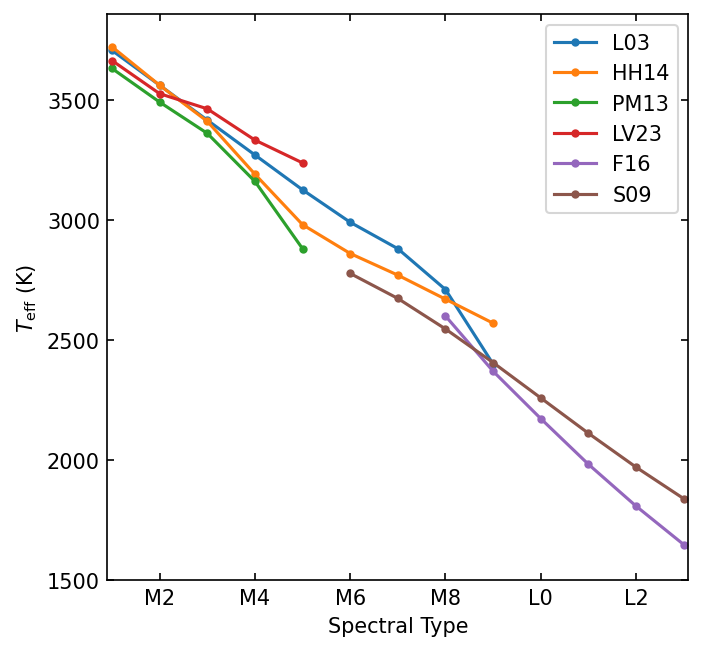

In [168]:
fig, ax = plt.subplots(figsize=(5,5), dpi=150)
spt_array = df['SpTnum']
for col in df.columns[2:-1]:
    plt.plot(spt_array, df[col].values, '.-', label=col)
    
plt.xlim(0.9, 13.1)
plt.legend()
# gets all the xticks, converts them into proper spectral type strings, then puts them as labels
ax.set_xticklabels(np.array([get_SpT_from_num(int(x)) for x in ax.get_xticks()]))
plt.ylim(1500, None)
ax.set_ylabel(r"$T_{\rm{eff}}$ (K)")
ax.set_xlabel("Spectral Type")